The objective of the following article is to obtain a step-by-step guide on building the `TBATS` model using `TBATS` with `Statsforecast`.

During this walkthrough, we will become familiar with the main `StatsForecast` class and some relevant methods such as `StatsForecast.plot`, `StatsForecast.forecast` and `StatsForecast.cross_validation` in other.

Let's start!!!

<a class="anchor" id="0.1"></a>
# **Table of Contents** 


1.	[Introduction](#1)
2.	[Definition of the TBATS model](#2)
3.	[Advantages of using TBATS](#3)
4.	[Case Study: Ads Forecast](#4)
5.	[Loading libraries and data](#5)
6.	[Explore Data with the plot method](#6)
7.	[Split the data into training and testing](#7)
8.	[Implementation of TBATS with StatsForecast](#8)
9.	[Evaluate the model](#9)
10.	[Conclusion](#10)
11. [References](#11)

# **1. Introduction** <a class="anchor" id="1"></a>

[Table of Contents](#0)


Time series analysis is a fundamental discipline in the field of statistics and econometrics, since it allows us to understand and predict the behavior of data that vary over time. In this context, the TBATS model (Trigonometric Seasonal, Box-Cox Transformation, ARMA residuals, Trend and Seasonality) has emerged as a powerful and flexible tool for the analysis and prediction of time series with trends and seasonality.

The TBATS model combines key elements from different approaches to provide a comprehensive and effective methodology. The "T" in TBATS refers to the model's ability to capture trends in the data, allowing both linear and non-linear trends to be modeled. The "B" represents the Box-Cox transformation, which adjusts the scale and symmetry of the data, thus improving the adaptability of the model. The "A" refers to the model's ability to model the residuals using an ARMA (Autoregressive Moving Average) model, allowing for capturing randomness and time dependence in the data. Finally, the "S" represents the model's ability to flexibly model seasonality using trigonometric functions, making it especially suitable for time series with complex and changing seasonal patterns.

The TBATS model has proven effective in various applications, such as sales prediction, demand estimation, price projection, and weather variable prediction. Its flexibility and ability to adapt to different trend patterns and seasonality make it a valuable tool for analyzing and predicting time series in a wide range of fields.

In this article, we will explore the TBATS model in detail, analyzing its main components and how it works. Furthermore, we will present application examples in different contexts and discuss the advantages and limitations of this approach. By understanding and mastering the TBATS model, data scientists and analysts will be able to harness its potential to improve the accuracy and understanding of time series, which in turn can support informed decision making in a variety of domains.

# **2. Definition of the TBATS model** <a class="anchor" id="2"></a>

[Table of Contents](#0)


The TBATS model is a powerful tool for forecasting time series data with multiple seasonal patterns and complex trends. Below is a breakdown of its key components:

**1. Box-Cox Transformation:**

*Applies a power transformation to the data to achieve normality and stabilize variance.
* Parameterized by `omega`, estimated during model fitting.

**2. Trend component:**

* Modeled using exponential smoothing with damping.
* The damping parameter is `phi`.

**3. Seasonal components:**

* Modeled using Fourier series with multiple frequencies.
* Frequencies are specified by `m1`, `m2`, ..., `mJ`.
* The number of Fourier terms for each seasonality is specified by `k1`, `k2`, ..., `kJ`.

**4. ARMA error model:**

* Models the autoregressive (AR) and moving average (MA) components of the error term.
* Orders are specified by `p` and `q`, respectively.

**5. State space representation:**

* TBATS can be formulated as a state space model, allowing for efficient and stable parameter estimation.

**Model equation:**

\begin{split}y_t^{(\omega)} =
\begin{cases}
\dfrac{y_t^\omega - 1}{\omega} & \text{if } \omega \neq 0, \\[8pt]
\ln{(y_t)} & \text{if } \omega = 0,

\end{cases}\end{split}




$$y_t^{(\omega)} = \ell_{t-1} +\phi b_{t-1}+ \sum_{i-1}^T s_{t-mi}^{(i)} +d_t$$

$$\ell_t=\ell_{t-1}+\phi b_{t-1}+\alpha d_t  $$

$$b_t=(1-\phi)b+\phi b_{t-1} +\beta d_t  $$

$$S_{t}^{(i)}= S_{t-mi}^{(i)}+\gamma_i d_t  $$   

$$d_t=\sum_{i=1}^p \varphi_i d_{t-i}  +\sum_{i=1}^q \theta_i \epsilon_{t-i} +\epsilon_t $$

where

- $y_t^{(\omega)}$: time series at moment $t$ (Box-Cox transformed)
- $S_{t}^{(i)}$: ith seasonal component
- $\ell_t$: local level
- $b_t$: trend with damping
- $d_t$: ARMA(p,q) process for residuals
- $\epsilon_t$: gaussian white noise

Seasonal part:

$$S_{t}^{(i)}= \sum_{j=1}^{k_i} S_{j,t}^{(i)}$$

$$S_{j,t}^{(i)}=S_{j,t-1}^{(i)} cos \lambda_j^{(i)} + S_{j,t-1}^{*(i)} sin \lambda_j^{(i)}+ \gamma_1^{(i)}d_t $$

$$S_{j,t}^{*(i)}=-S_{j,t-1}^{(i)} sin \lambda_j^{(i)} + S_{j,t-1}^{*(i)} cos \lambda_j^{(i)}+ \gamma_2^{(i)}d_t $$

where

- $T$: Amount of seasonalities
- $m_i$: Length of ith seasonal period
- $k_i$: Amount of harmonics for ith seasonal period
- $\lambda$:Box-Cox Transformation
- $\alpha, \beta$: Smoothing
- $\phi$: Trend damping
- $\varphi_i, \theta_i$: ARMA(p,q) coefficients
- $\gamma_1^{(i)}, \gamma_2^{(i)}$: seasonal smoothing (two for each period)

Each seasonality is modeled using a trigonometric representation based on Fourier series. An important advantage of this approach is that it requires only two seed states regardless of the length of the period. Another advantage is the ability to model seasonal effects of non-integer lengths. For example, given a series of daily observations, leap years can be modeled with a season length of 365.25.

# **3. Advantages of using TBATS** <a class="anchor" id="3"></a>

[Table of Contents](#0)

Below is a table that summarizes the advantages and disadvantages of the TBATS model (Trigonometric Seasonal, Box-Cox Transformation, ARMA residuals, Trend and Seasonality):

| Advantages | Disadvantages |
|--------------------------------------------------|-----------------------------------------------|
| 1. Management of multiple seasonality components | 1. Greater complexity compared to other models |
| 2. Flexibility in trend modeling | 2. Increased calculation time needed to fit the model |
| 3. Ability to fit Box-Cox transformations | 3. Requires a sufficient historical data set |
| 4. Incorporation of autoregressive components | 4. Sensitivity to outliers and missing data |
| 5. Suitable for time series with complex patterns | |

It is important to note that these advantages and disadvantages may vary depending on the context and specific data used in the TBATS model. In addition, it is advisable to consider other alternative models and forecasting techniques according to the characteristics and requirements of each situation.

# **4. Case Study: Ads Forecast** <a class="anchor" id="4"></a>

[Table of Contents](#0)

In this case study, we will focus on forecasting the number of ads viewed using hourly data. We will use the TBATS (Trigonometric seasonality, Box-Cox transformation, ARMA errors, Trend and Seasonal components) time series model to predict the number of ads that will be seen in future hours. This approach will allow us to obtain accurate and reliable forecasts, taking into account seasonality, trend and complex patterns present in the viewed ad data.

Data and objective:
We have a historical data set that records the number of ads viewed in hourly intervals over time. Our goal is to use this data set to develop a forecasting model that can accurately predict the number of ads that will be seen in the next few hours. This will allow businesses to plan and adjust their advertising strategies based on ad view estimates.

Methodology:
We will use the TBATS model, which is a robust and flexible time series approach that can handle multiple seasonal components and trends in the data. The TBATS model combines trigonometric decomposition of seasonality, Box-Cox transformation to stabilize variance, ARMA (Autoregressive Moving Average) errors to model time dependence, and trend and seasonality components to capture long-term patterns.

The first step will be to explore and analyze historical data of ads viewed per hour. We will identify any seasonal patterns, trends or anomalies present in the data to better understand the dynamics of ads seen over time.

Once the model is validated, we will proceed to make forecasts of the number of ads viewed for the next few hours. These forecasts will provide us with reliable and up-to-date estimates of ad demand, allowing companies to adapt their advertising strategies in real time and optimize ad delivery at key times.

Results and conclusions:
The forecast results using the TBATS model will help us understand and predict the number of ads viewed based on time of day, days of the week, and other relevant factors. This will allow businesses to make informed decisions about resource allocation, ad inventory planning, and optimizing ad delivery during times of high demand.

In conclusion, using the TBATS time series model for forecasting ads viewed per hour provides a powerful tool for businesses that want to optimize their online advertising strategy. By leveraging seasonal patterns, trends, and time dependency in viewed ad data, the TBATS model delivers accurate, up-to-date forecasts that can help businesses maximize their return on advertising investment and improve ad delivery efficiency.

# **5. Loading libraries and data** <a class="anchor" id="5"></a>

[Table of Contents](#0.1)

In [1]:
# Handling and processing of Data
# ==============================================================================
import numpy as np
import pandas as pd

import scipy.stats as stats

# StatsForecast
# ==============================================================================
from statsforecast import StatsForecast
from utilsforecast.plotting import plot_series

# Hide warnings
# ==============================================================================
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

/Users/user/Documents/miniconda3/envs/statsforecast/lib/python3.10/site-packages/statsforecast/core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# Plot
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import seaborn as sns
plt.style.use('grayscale') # fivethirtyeight  grayscale  classic
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#008080',  # #212946
    'axes.facecolor': '#008080',
    'savefig.facecolor': '#008080',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#000000',  #2A3459
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)
# Define the plot size
# ==============================================================================

plt.rcParams['figure.figsize'] = (18,7)

# Hide warnings
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

## **5.1 Read Data**

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/Naren8520/Serie-de-tiempo-con-Machine-Learning/main/Data/ads.csv")
df.head()

,Time,Ads
0,2017-09-13T00:00:00,80115
1,2017-09-13T01:00:00,79885
2,2017-09-13T02:00:00,89325
3,2017-09-13T03:00:00,101930
4,2017-09-13T04:00:00,121630


The input to StatsForecast is always a data frame in long format with three columns: unique_id, ds and y:

* The `unique_id` (string, int or category) represents an identifier for the series.

* The `ds` (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp.

* The `y` (numeric) represents the measurement we wish to forecast.

In [4]:
df["unique_id"]="1"
df.columns=["ds", "y", "unique_id"]
df.head()

,ds,y,unique_id
0,2017-09-13T00:00:00,80115,1
1,2017-09-13T01:00:00,79885,1
2,2017-09-13T02:00:00,89325,1
3,2017-09-13T03:00:00,101930,1
4,2017-09-13T04:00:00,121630,1


In [5]:
df.tail()

,ds,y,unique_id
211,2017-09-21T19:00:00,155890,1
212,2017-09-21T20:00:00,123395,1
213,2017-09-21T21:00:00,103080,1
214,2017-09-21T22:00:00,95155,1
215,2017-09-21T23:00:00,80285,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ds         216 non-null    object
 1   y          216 non-null    int64 
 2   unique_id  216 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.2+ KB


We can see that our time variable `(ds)` is in an object format, we need to convert to a date format

In [7]:
# Convert to a datetime format
from datetime import datetime
df["ds"] = pd.to_datetime(df["ds"])

# **6. Explore Data with the plot method** <a class="anchor" id="6"></a>

[Table of Contents](#0.1)

Plot some series using the plot method from the StatsForecast class. This method prints 8 random series from the dataset and is useful for basic EDA.

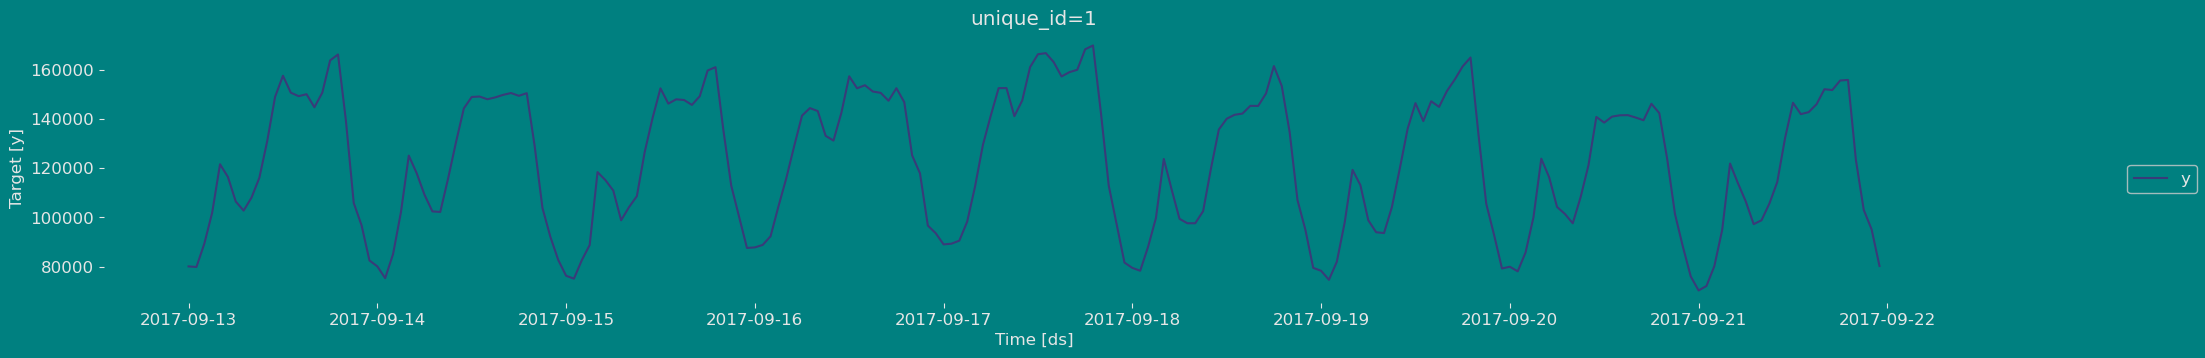

In [8]:
from statsforecast import StatsForecast

StatsForecast.plot(df, engine="matplotlib")

## **6.1 Autocorrelation plots**

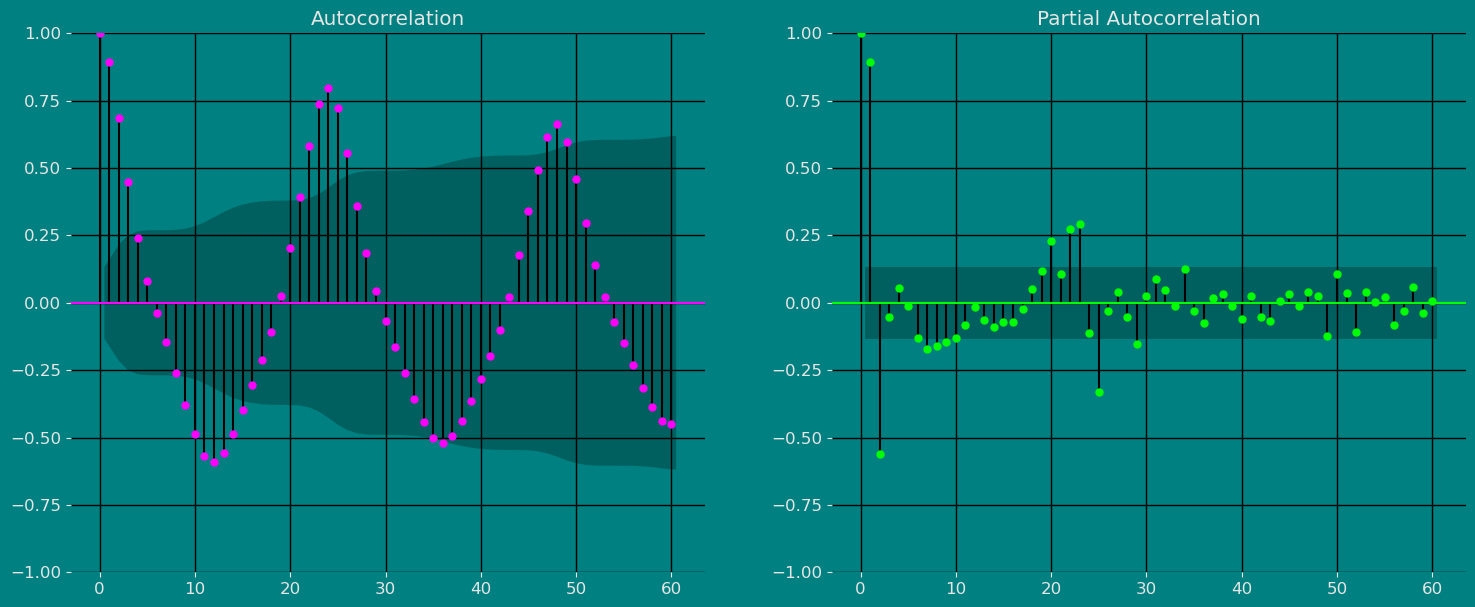

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

# Grafico
plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

#plt.savefig("Gráfico de Densidad y qq")
plt.show();

## **6.2 Seasonal plots**

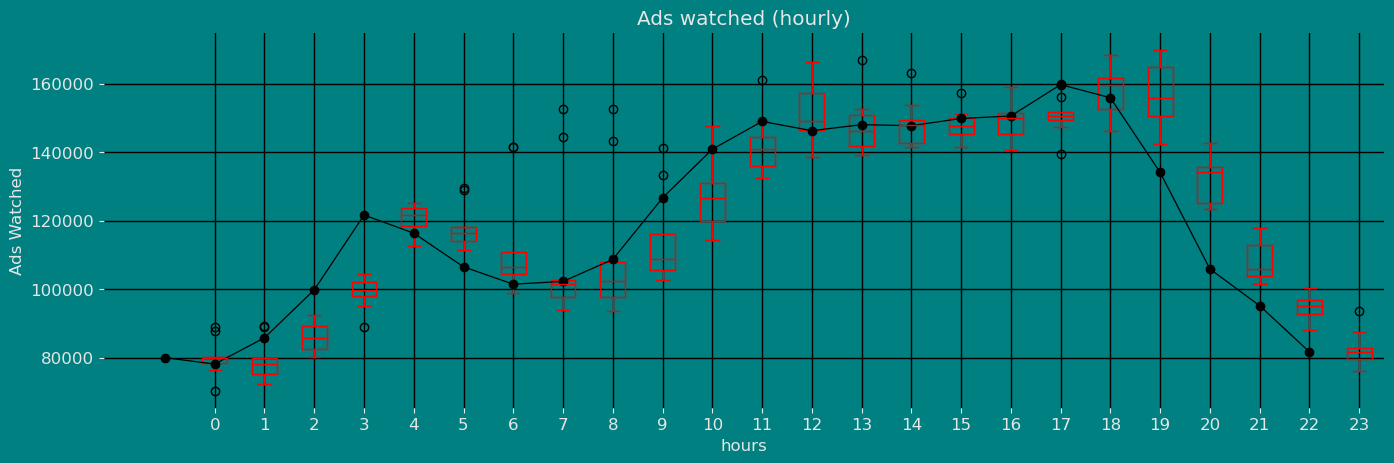

In [10]:
# Boxplot graph for hourly seasonality
# ==============================================================================
df1=df.copy()
fig, ax = plt.subplots(figsize=(16, 5))
df1['hours'] = df1['ds'].apply(lambda x: x.hour)
df1.boxplot(column="y", by='hours', ax=ax, color="red")
df1.groupby('hours')["y"].median().plot(style='o-', linewidth=0.9, ax=ax)
ax.set_ylabel('Ads Watched')
ax.set_title('Ads watched (hourly)')
fig.suptitle('');
#plt.savefig("Gráfico de Barra")

# **7. Split the data into training and testing** <a class="anchor" id="7"></a>

[Table of Contents](#0.1)

Let's divide our data into sets
1. Data to train our `TBATS` model
2. Data to test our model

For the test data we will use the last 24 hourly to test and evaluate the performance of our model.

In [11]:
train = df[df.ds<='2017-09-20 17:00:00'] 
test = df[df.ds>'2017-09-20 17:00:00'] 

train.shape, test.shape

((186, 3), (30, 3))

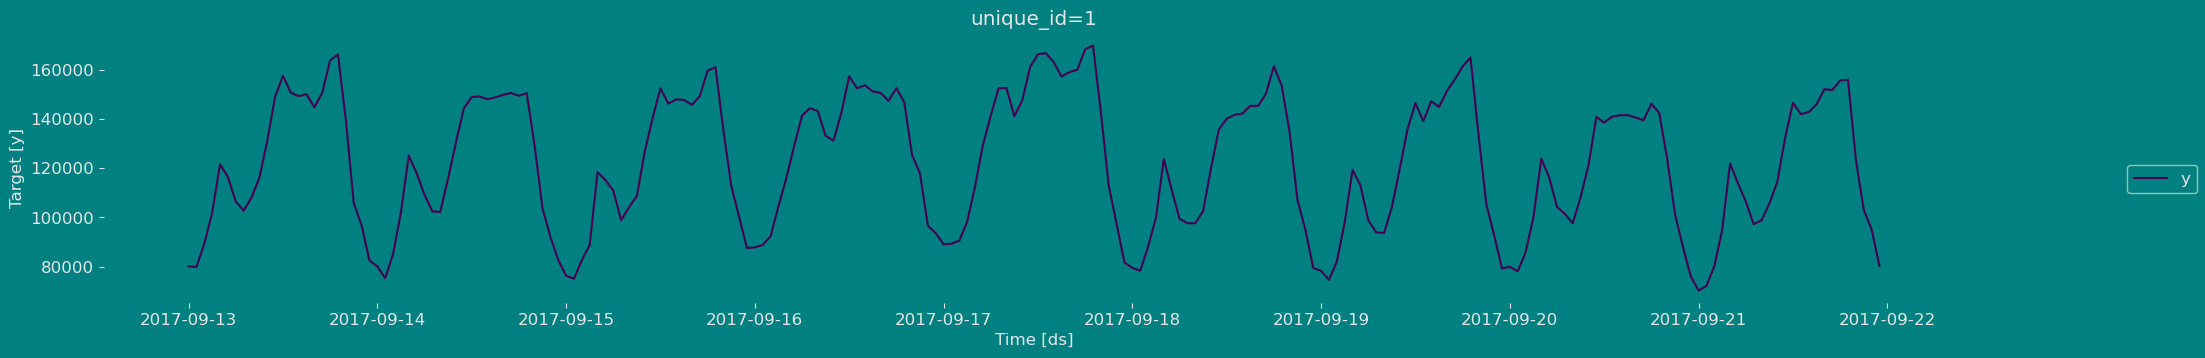

In [12]:
plot_series(train, test,max_insample_length=500)

# **8. Implementation with StatsForecast** <a class="anchor" id="8"></a>

[Table of Contents](#0.1)


We are going to train the `TBATS` model, using the  `TBATS` function. This model will help us forecast candy production in the next 12 months

## **8.1 Load libraries**

In [13]:
from statsforecast import StatsForecast
from statsforecast.models import TBATS, ARIMA

In [14]:
?TBATS

Init signature:
TBATS(
    seasonal_periods: Union[int, List[int]],
    use_boxcox: bool = True,
    bc_lower_bound: float = 0.0,
    bc_uppper_bound: float = 1.5,
    use_trend: bool = True,
    use_damped_trend: bool = False,
    use_arma_errors: bool = False,
    alias: str = 'TBATS',
)
Docstring:     
Trigonometric Box-Cox transform, ARMA errors, Trend and Seasonal components (TBATS) model.

TBATS is an innovations state space model framework used for forecasting time series with multiple seasonalities. It uses a Box-Cox tranformation, ARMA errors, and a trigonometric representation of the seasonal patterns based on Fourier series.

The name TBATS is an acronym for the key features of the model: Trigonometric, Box-Cox transform, ARMA errors, Trend, and Seasonal components.

References
----------
- [De Livera, A. M., Hyndman, R. J., & Snyder, R. D. (2011). Forecasting time series with complex seasonal patterns using exponential smoothing. Journal of the American statistical associat

## **8.2 Building Model**
Import and instantiate the models. Setting the argument is sometimes tricky. This article on [Seasonal periods](https://robjhyndman.com/hyndsight/seasonal-periods/) by the master, Rob Hyndmann, can be useful.season_length.



In [15]:
season_length = 24 # Monthly data 
horizon = len(test) # number of predictions

# We call the model that we are going to use
models = [TBATS(seasonal_periods=season_length ),ARIMA(order=(1, 1, 1), season_length=season_length)]
                    

We fit the models by instantiating a new StatsForecast object with the following parameters:

models: a list of models. Select the models you want from models and import them.

* `freq:` a string indicating the frequency of the data. (See [panda’s available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).)

* `n_jobs:` n_jobs: int, number of jobs used in the parallel processing, use -1 for all cores.

* `fallback_model:` a model to be used if a model fails.

Any settings are passed into the constructor. Then you call its fit method and pass in the historical data frame.

In [16]:
# Instantiate StatsForecast class as sf
sf = StatsForecast(df=train,
                   models=models,
                   freq='H', 
                   n_jobs=-1)

## **8.3 Fit the Model**

In [17]:
# fit the models
sf.fit()

StatsForecast(models=[TBATS,ARIMA])

Let's see the results of our TBATS model. We can observe it with the following instruction:

In [18]:
result=sf.fitted_[0,0].model_
result

{'fitted': array([[11.27027831, 11.31461152, 11.38656132, 11.53255884, 11.64400902,
         11.75215043, 11.63796167, 11.52675499, 11.54138908, 11.66674496,
         11.77854076, 11.87888987, 11.95005372, 11.95277151, 11.89297835,
         11.90867277, 11.94952798, 11.923224  , 11.93659095, 11.96463488,
         11.90594073, 11.66967596, 11.38341143, 11.34523188, 11.27484494,
         11.33067114, 11.33695592, 11.48570441, 11.64243907, 11.76920819,
         11.63299649, 11.53788497, 11.53959984, 11.62985903, 11.80267411,
         11.89359418, 11.9161262 , 11.88392324, 11.87367501, 11.89936799,
         11.94208743, 11.95685324, 11.93259718, 11.87195033, 11.8169861 ,
         11.60969254, 11.36929651, 11.28331506, 11.25654514, 11.27419638,
         11.34361215, 11.4743071 , 11.51457217, 11.71694508, 11.6057478 ,
         11.54011782, 11.4887413 , 11.6400678 , 11.74141282, 11.87011475,
         11.89821475, 11.91086761, 11.85290363, 11.89497425, 11.93085222,
         11.92122192, 11.912

Let us now visualize the residuals of our models.

As we can see, the result obtained above has an output in a dictionary, to extract each element from the dictionary we are going to use the `.get()` function to extract the element and then we are going to save it in a `pd.DataFrame()`.

In [19]:
errors=pd.DataFrame(result.get("errors")).T
errors.columns=["error"]
errors

,error
0,0.020940
1,-0.026268
2,0.013475
3,-0.000517
4,0.064730
...,...
181,0.038505
182,0.038762
183,0.000209
184,-0.041628


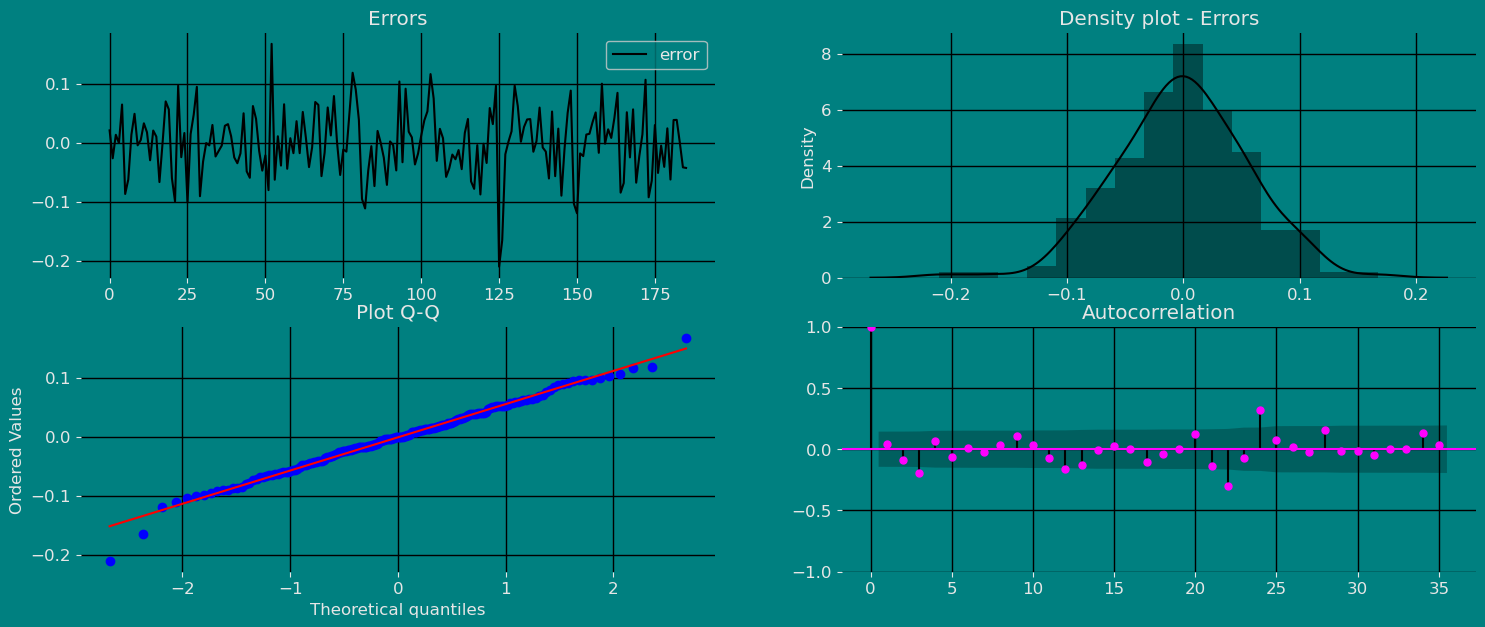

In [20]:
fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
errors.plot(ax=axs[0,0])
axs[0,0].set_title("Errors");

# plot
sns.distplot(errors, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Errors");

# plot
stats.probplot(errors["error"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(errors,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();

## **8.4 Forecast Method**

If you want to gain speed in productive settings where you have multiple series or models we recommend using the `StatsForecast.forecast` method instead of `.fit` and `.predict`.

The main difference is that the `.forecast` doest not store the fitted values and is highly scalable in distributed environments.

The forecast method takes two arguments: forecasts next `h` (horizon) and `level`.

* `h (int):` represents the forecast h steps into the future. In this case, 12 months ahead.

* `level (list of floats):` this optional parameter is used for probabilistic forecasting. Set the level (or confidence percentile) of your prediction interval. For example, `level=[90]` means that the model expects the real value to be inside that interval 90% of the times.

The forecast object here is a new data frame that includes a column with the name of the model and the y hat values, as well as columns for the uncertainty intervals. Depending on your computer, this step should take around 1min. (If you want to speed things up to a couple of seconds, remove the AutoModels like `ARIMA` and `Theta`)

In [21]:
# Prediction
Y_hat = sf.forecast(horizon, fitted=True)

Y_hat

,ds,TBATS,ARIMA
unique_id,,,
1,2017-09-20 18:00:00,138650.125000,138977.937500
1,2017-09-20 19:00:00,130807.750000,138760.859375
1,2017-09-20 20:00:00,116445.742188,138673.109375
1,2017-09-20 21:00:00,99088.257812,138637.640625
1,2017-09-20 22:00:00,83084.703125,138623.296875
1,2017-09-20 23:00:00,71847.867188,138617.500000
1,2017-09-21 00:00:00,67274.070312,138615.156250
1,2017-09-21 01:00:00,70080.359375,138614.218750
1,2017-09-21 02:00:00,79756.390625,138613.828125


In [22]:
values=sf.forecast_fitted_values()
values.head()

,ds,y,TBATS,ARIMA
unique_id,,,,
1,2017-09-13 00:00:00,80115.0,78143.460938,80034.882812
1,2017-09-13 01:00:00,79885.0,81683.187500,80078.273438
1,2017-09-13 02:00:00,89325.0,87772.382812,79810.265625
1,2017-09-13 03:00:00,101930.0,101558.976562,94906.203125
1,2017-09-13 04:00:00,121630.0,113523.406250,108333.929688


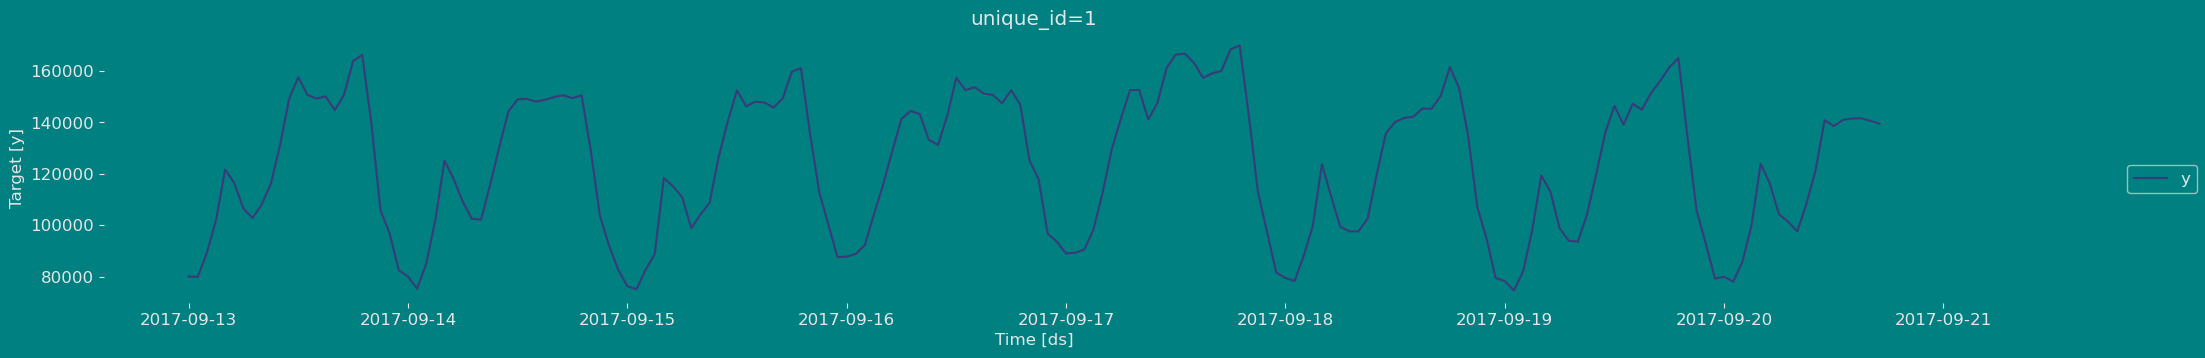

In [23]:
StatsForecast.plot(values)

## **Forecasting Plot**

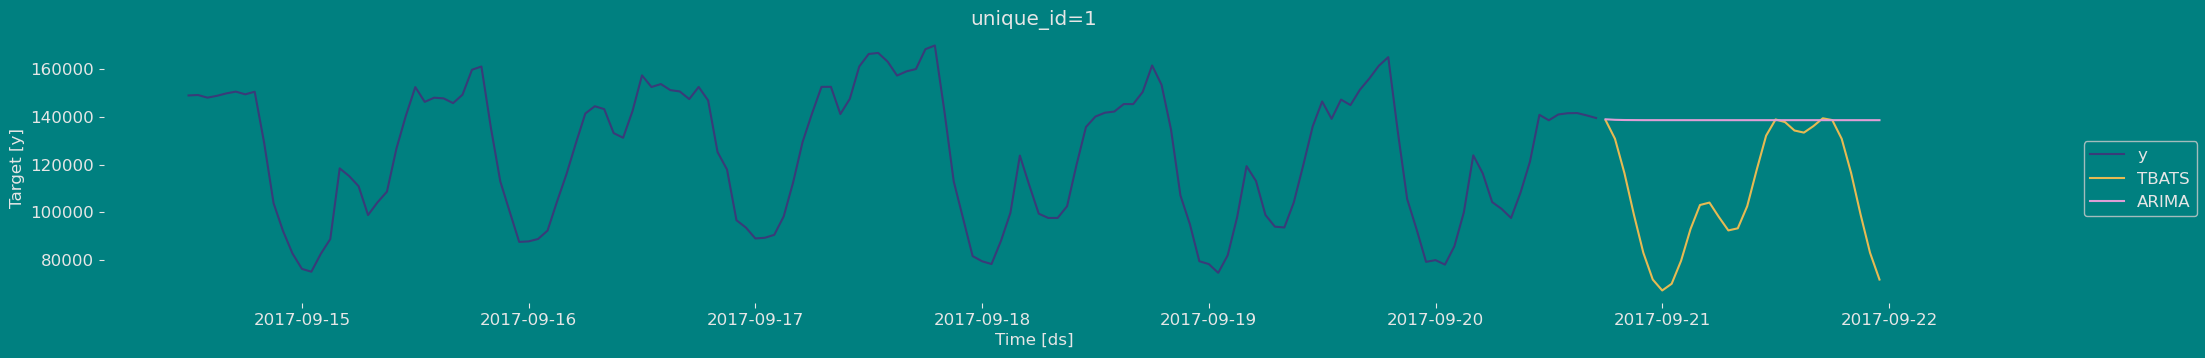

In [24]:
sf.plot(train, Y_hat, max_insample_length=150)

Adding 95% confidence interval with the forecast method

In [25]:
forecast_df=sf.forecast(h=horizon, level=[95])
forecast_df

,ds,TBATS,TBATS-lo-95,TBATS-hi-95,ARIMA,ARIMA-lo-95,ARIMA-hi-95
unique_id,,,,,,,
1,2017-09-20 18:00:00,138650.125000,124276.648438,154685.906250,138977.937500,119873.132812,158082.750000
1,2017-09-20 19:00:00,130807.750000,112378.414062,152259.156250,138760.859375,102866.531250,174655.187500
1,2017-09-20 20:00:00,116445.742188,97491.851562,139084.296875,138673.109375,88575.335938,188770.875000
1,2017-09-20 21:00:00,99088.257812,81858.984375,119943.585938,138637.640625,76481.195312,200794.078125
1,2017-09-20 22:00:00,83084.703125,68126.343750,101327.195312,138623.296875,66011.695312,211234.906250
1,2017-09-20 23:00:00,71847.867188,58520.125000,88210.718750,138617.500000,56738.496094,220496.515625
1,2017-09-21 00:00:00,67274.070312,54324.750000,83309.875000,138615.156250,48364.808594,228865.515625
1,2017-09-21 01:00:00,70080.359375,56004.117188,87694.296875,138614.218750,40686.593750,236541.843750
1,2017-09-21 02:00:00,79756.390625,63110.570312,100792.304688,138613.828125,33561.343750,243666.328125


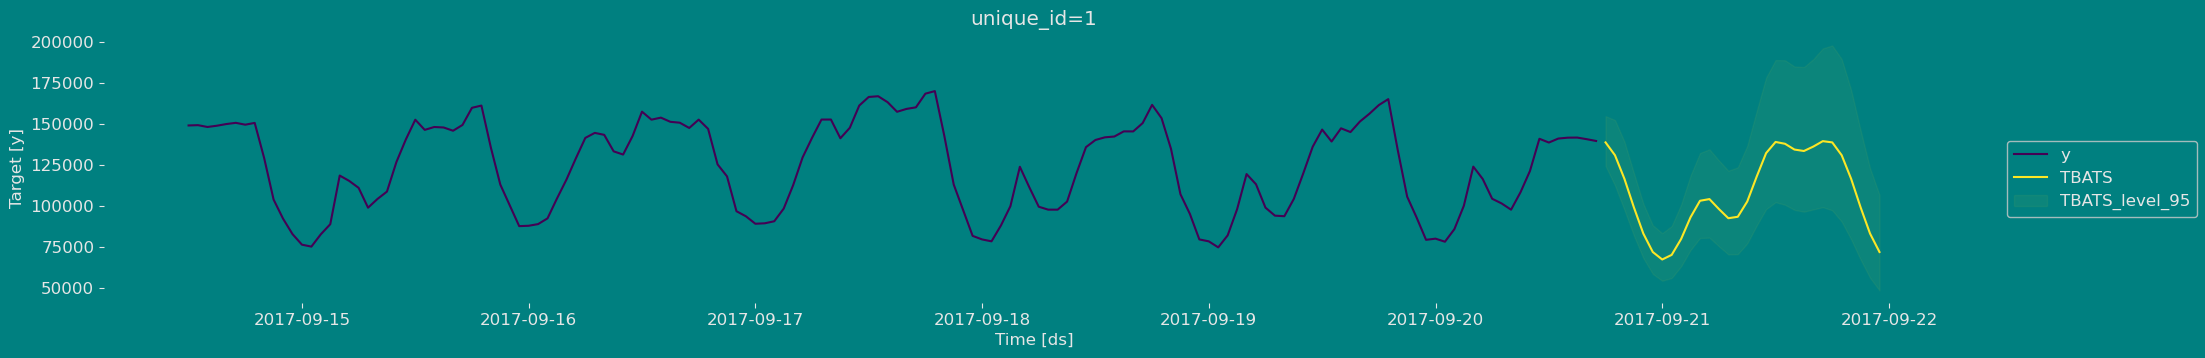

In [27]:
plot_series(train, forecast_df.reset_index(),max_insample_length=150, level=[95], models=["TBATS"])

# **9. Evaluate the model** <a class="anchor" id="9"></a>

[Table of Contents](#0.1)


In [28]:
from datasetsforecast.losses import (mae, mape, mase, rmse, smape)
from utilsforecast.evaluation import evaluate

In [29]:
def evaluate_performace(y_hist, y_true, y_pred, models):
    y_true = pd.merge(y_true,y_pred, how='left', on=['ds'])
    evaluation = {}
    for model in models:
        evaluation[model] = {}
        for metric in [mase, mae, mape, rmse, smape]:
            metric_name = metric.__name__
            if metric_name == 'mase':
                evaluation[model][metric_name] = metric(y_true['y'].values,
                                                 y_true[model].values,
                                                 y_hist['y'].values, seasonality=24)
            else:
                evaluation[model][metric_name] = metric(y_true['y'].values, y_true[model].values)
    return pd.DataFrame(evaluation).T

In [30]:
print(evaluate_performace(train, test,Y_hat , models=["TBATS","ARIMA"]))

           mase           mae       mape          rmse      smape
TBATS  0.967511   7830.810938   6.419353   9716.096391   6.716095
ARIMA  3.572169  28912.299479  30.988134  35275.912514  24.641293


# **10. Conclusion** <a class="anchor" id="10"></a>

[Table of Contents](#0.1)

Analysis of the results:

Comparing the results obtained from the TBATS and ARIMA model for forecasting viewed ads, we can observe the following performance metrics:

1. MASE (Mean Absolute Scaled Error): The MASE value for the TBATS model is 0.967511, while for the ARIMA model it is 3.572169. The MASE compares the model error with the error of a naive model (such as the mean or the last observed value). A MASE value close to 1 indicates that the model is good compared to the naive model. In this case, the TBATS model has a MASE closer to 1, indicating that it is better than the ARIMA model in terms of accuracy.

2. MAE (Mean Absolute Error): The MAE value for the TBATS model is 7830.810938, while for the ARIMA model it is 28912.299479. The MAE represents the average of the absolute differences between the predictions and the actual values. A lower MAE value indicates a smaller discrepancy between predictions and actual values. In this case, the TBATS model has a considerably lower MAE compared to the ARIMA model, indicating higher prediction accuracy.

3. MAPE (Mean Absolute Percentage Error): The MAPE value for the TBATS model is 6.419353, while for the ARIMA model it is 30.988134. The MAPE represents the average percentage error in relation to the actual values. A lower MAPE value indicates a lower error rate in the predictions. In this case, the TBATS model has a significantly lower MAPE than the ARIMA model, indicating better prediction accuracy.

4. RMSE (Root Mean Squared Error): The RMSE value for the TBATS model is 9716.096391, while for the ARIMA model it is 35275.912514. The RMSE represents the square root of the average of the squared errors. A lower RMSE value indicates a lower spread of errors and therefore higher prediction accuracy. In this case, the TBATS model has a considerably lower RMSE compared to the ARIMA model, indicating higher prediction accuracy.

5. SMAPE (Symmetric Mean Absolute Percentage Error): The SMAPE value for the TBATS model is 6.716095, while for the ARIMA model it is 24.641293. The SMAPE represents the average of the absolute percentage differences between the predictions and the actual values. A lower SMAPE value indicates a lower error rate in the predictions. In this case, the TBATS model has a significantly lower SMAPE than the ARIMA model, indicating better prediction accuracy.

Overall, analyzing all the performance metrics, we can conclude that the TBATS model outperforms the ARIMA model in terms of accuracy in forecasting viewed ads. The TBATS model shows lower values of MASE, MAE, MAPE, RMSE and SMAPE, indicating higher precision and lower error in the predictions. Therefore, it would be recommended to use the TBATS model for forecasting ad views based on these results.

## **Acknowledgements**

We would like to thank [Naren Castellon](https://www.linkedin.com/in/naren-castellon-1541b8101/?originalsubdomain=pa) for writing this tutorial.

# **11. References** <a class="anchor" id="11"></a>

[Table of Contents](#0.1)

1. Changquan Huang • Alla Petukhina. Springer series (2022). Applied Time Series Analysis and Forecasting with Python. 
2. Ivan Svetunkov. [Forecasting and Analytics with the Augmented Dynamic Adaptive Model (ADAM)](https://openforecast.org/adam/)
3. [James D. Hamilton. Time Series Analysis Princeton University Press, Princeton, New Jersey, 1st Edition, 1994.](https://press.princeton.edu/books/hardcover/9780691042893/time-series-analysis)
4. [Nixtla Parameters Arima](https://nixtlaverse.nixtla.io/statsforecast/src/core/models.html#arima).
5. [Model Arima](https://nixtlaverse.nixtla.io/statsforecast/docs/models/arima.html)
6. [Pandas available frequencies](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).
7. [Rob J. Hyndman and George Athanasopoulos (2018). “Forecasting principles and practice, Time series cross-validation”.](https://otexts.com/fpp3/tscv.html).
8. [Seasonal periods- Rob J Hyndman](https://robjhyndman.com/hyndsight/seasonal-periods/).